<a href="https://colab.research.google.com/github/daaanum/daaan/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 딥러닝 모델 만들기

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import pandas as pd
import numpy as np

x = [-3,31,-11,4,0,22,-2,-5,-25,-14]
y = [-2,32,-10,5,1,23,-1,-4,-24,-13]

X_train = np.array(x).reshape(-1,1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [6]:
model.fit(X_train, y_train, epochs=3000, verbose=0)

In [7]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.99461603]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.9974435], dtype=float32)>]

In [9]:
model.predict([[11],[12],[13]])

array([[11.93822 ],
       [12.932836],
       [13.927451]], dtype=float32)

딥러닝을 활용한 회귀 분석: 보스턴 주택 가격 예측

In [10]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.8.0


In [11]:
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:", SEED)

시드 고정: 12


In [12]:
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)

(506, 13) (506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, shuffle=True, random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
  model = Sequential()
  model.add(Dense(128, activation='relu',input_dim=num_input))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer='adam', loss='mse',metrics=['mae'])

  return model

model = build_model(num_input=13)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 87.6453 - mae: 6.9585 - 755ms/epoch - 58ms/step
Epoch 2/100
13/13 - 0s - loss: 66.3272 - mae: 5.8104 - 45ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 65.1841 - mae: 5.7634 - 50ms/epoch - 4ms/step
Epoch 4/100
13/13 - 0s - loss: 59.6214 - mae: 5.6163 - 56ms/epoch - 4ms/step
Epoch 5/100
13/13 - 0s - loss: 55.4058 - mae: 5.3637 - 70ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 65.1745 - mae: 5.7097 - 85ms/epoch - 7ms/step
Epoch 7/100
13/13 - 0s - loss: 55.0851 - mae: 5.6530 - 86ms/epoch - 7ms/step
Epoch 8/100
13/13 - 0s - loss: 55.0642 - mae: 5.2550 - 32ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 51.0933 - mae: 5.1127 - 32ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 45.4516 - mae: 4.7980 - 33ms/epoch - 3ms/step
Epoch 11/100
13/13 - 0s - loss: 48.3348 - mae: 5.0286 - 33ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 45.4269 - mae: 4.7722 - 32ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 58.0283 - mae: 5.6321 - 30ms/epoch - 2m

In [23]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 21.3641 - mae: 3.2363


[21.3641414642334, 3.236255407333374]

In [25]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25, verbose=2)

Epoch 1/200
10/10 - 1s - loss: 370.1654 - mae: 14.6129 - val_loss: 125.8315 - val_mae: 9.0202 - 662ms/epoch - 66ms/step
Epoch 2/200
10/10 - 0s - loss: 98.7852 - mae: 6.9537 - val_loss: 52.6608 - val_mae: 4.9962 - 49ms/epoch - 5ms/step
Epoch 3/200
10/10 - 0s - loss: 70.9970 - mae: 6.3549 - val_loss: 51.0423 - val_mae: 5.0795 - 44ms/epoch - 4ms/step
Epoch 4/200
10/10 - 0s - loss: 66.5547 - mae: 5.6352 - val_loss: 50.8034 - val_mae: 5.2322 - 49ms/epoch - 5ms/step
Epoch 5/200
10/10 - 0s - loss: 65.5845 - mae: 5.6685 - val_loss: 50.2695 - val_mae: 5.0668 - 60ms/epoch - 6ms/step
Epoch 6/200
10/10 - 0s - loss: 66.3856 - mae: 5.7887 - val_loss: 54.6249 - val_mae: 4.7900 - 47ms/epoch - 5ms/step
Epoch 7/200
10/10 - 0s - loss: 62.5665 - mae: 5.5290 - val_loss: 48.3676 - val_mae: 5.4401 - 64ms/epoch - 6ms/step
Epoch 8/200
10/10 - 0s - loss: 60.6847 - mae: 5.4761 - val_loss: 48.9151 - val_mae: 4.6399 - 61ms/epoch - 6ms/step
Epoch 9/200
10/10 - 0s - loss: 60.6794 - mae: 5.4556 - val_loss: 47.2945 - 

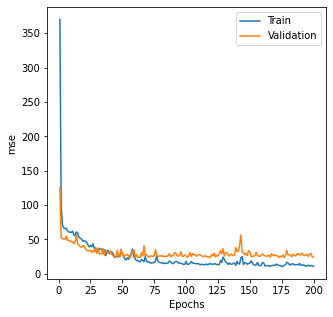

In [31]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
  plt.figure(figsize=(5,5))
  plt.plot(range(start, total_epoch+1),
           history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch+1),
           history.history['val_loss'][start-1:total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('mse')
  plt.legend()
  plt.show()


plot_loss_curve(total_epoch=200, start=1)

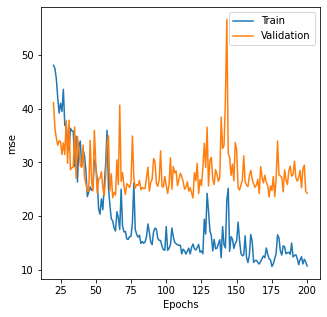

In [33]:
plot_loss_curve(total_epoch=200, start=20)

딥러닝을 활용한 분류 예측: 와인 품질 등급 판별

In [35]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:", SEED)

시드 고정: 12


In [36]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [38]:
drive_path = "/gdrive/My Drive/"

train = pd.read_csv(drive_path + 'wine/train.csv')
test = pd.read_csv(drive_path + 'wine/test.csv')
submission = pd.read_csv(drive_path + 'wine/sample_submission.csv')

print(train.shape, test.shape, submission.shape)

(5497, 14) (1000, 13) (1000, 2)


In [39]:
train.head(2)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red


In [40]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [41]:
train['type'].value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [42]:
train['type'] = np.where(train['type']=='white',1,0).astype(int)
test['type'] = np.where(test['type']=='white',1,0).astype(int)
train['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [43]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [44]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train.loc[:,'quality']-3)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
X_train = train.loc[:,'fixed acidity':]
X_test = test.loc[:,'fixed acidity':]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape)

(5497, 12) (5497, 7)
(1000, 12)
